In [94]:
!pip install transformers
!pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import re
from nltk.util import bigrams, trigrams
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# set sns plot 
sns.set_theme()
sns.set_theme(style="whitegrid")
sns.set_context("talk")

In [8]:
following = pd.read_csv("../../Dataset/tweets/followings_data.csv") # read twitter data

In [9]:
label_dict = {0: "Religion", 1: "NSFW", 2:"Racism", 3: "Disciminatory", 4:"No Abuse"} # manual labels set
following['label_text'] = following['labels'].map(label_dict) 

In [10]:
following

,user,tweets,labels,follows,label_text
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,NSFW
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,No Abuse
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,No Abuse
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,NSFW
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,Religion
...,...,...,...,...,...
4259,user52,And she's pushing for Sharia Law in America. ...,0,following65,Religion
4260,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,Religion
4261,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,Religion
4262,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,Religion


In [11]:
following = following.drop_duplicates(subset=['tweets']).reset_index(drop=True) # remove duplicated tweets

In [12]:
stopwords_set = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text, ngram=True):
    text = re.sub(r"b['\"]", '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\\\w+', '', text)
    text = re.sub(r'\\x[a-fA-F0-9]{2}', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.split(r'\btruncated\b', text, maxsplit=1)[0]
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    tokens = word_tokenize(text)
    if ngram: # for n gram analysis, lemmatize words else perform normal cleaning
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
        text = ' '.join(filtered_tokens)
    return text


In [13]:
following['cleaned'] = following['tweets'].apply(lambda x: clean_text(x)) 
following['cleaned_transform'] = following['tweets'].apply(lambda x: clean_text(x, ngram=False))

In [14]:
following

,user,tweets,labels,follows,label_text,cleaned,cleaned_transform
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,NSFW,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,No Abuse,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,No Abuse,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,NSFW,fuck bit leave dont u understand,fuck off what bit about leave dont u understand
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,Religion,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...
...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,Religion,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,Religion,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,Religion,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,Religion,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...


In [15]:
# remove missing rows
to_drop = following[following['cleaned'] == ""].index 
following.drop(to_drop, inplace=True)

In [16]:
following[['tweets', 'cleaned', "label_text"]]

,tweets,cleaned,label_text
0,"b""@theresa_may U are a complete bitch an a sel...",u complete bitch sell part deal dont u underst...,NSFW
1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",true barnier eu pushing u deal leaver want eu ...,No Abuse
2,"b""@theresa_may @10DowningStreet Why do u never...",u never celebrate st george day didnt u cover ...,No Abuse
3,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",fuck bit leave dont u understand,NSFW
4,b'RT @RealitySmash: The left want this video o...,left want video muslim peaceful muslimming she...,Religion
...,...,...,...
3473,And she's pushing for Sharia Law in America. ...,shes pushing sharia law america shes dangerous,Religion
3474,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,people cant allow illegals rewrite law sharia ...,Religion
3475,RT @monk_asian: #Sharia's procedure of #hand a...,sharia procedure hand foot chopping tie reduce...,Religion
3476,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,sharia law violates billofrights 1440 yr clash...,Religion


In [17]:
def create_ngrams(text, n):
    tokens = word_tokenize(text)
    bigrams = list(ngrams(tokens, n))
    return bigrams

In [18]:
following['bigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 2))
following['trigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 3))

In [19]:
following

,user,tweets,labels,follows,label_text,cleaned,cleaned_transform,bigram,trigram
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,NSFW,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...,"[(u, complete), (complete, bitch), (bitch, sel...","[(u, complete, bitch), (complete, bitch, sell)..."
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,No Abuse,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...,"[(true, barnier), (barnier, eu), (eu, pushing)...","[(true, barnier, eu), (barnier, eu, pushing), ..."
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,No Abuse,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...,"[(u, never), (never, celebrate), (celebrate, s...","[(u, never, celebrate), (never, celebrate, st)..."
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,NSFW,fuck bit leave dont u understand,fuck off what bit about leave dont u understand,"[(fuck, bit), (bit, leave), (leave, dont), (do...","[(fuck, bit, leave), (bit, leave, dont), (leav..."
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,Religion,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...,"[(left, want), (want, video), (video, muslim),...","[(left, want, video), (want, video, muslim), (..."
...,...,...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,Religion,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...,"[(shes, pushing), (pushing, sharia), (sharia, ...","[(shes, pushing, sharia), (pushing, sharia, la..."
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,Religion,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...,"[(people, cant), (cant, allow), (allow, illega...","[(people, cant, allow), (cant, allow, illegals..."
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,Religion,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...,"[(sharia, procedure), (procedure, hand), (hand...","[(sharia, procedure, hand), (procedure, hand, ..."
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,Religion,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...,"[(sharia, law), (law, violates), (violates, bi...","[(sharia, law, violates), (law, violates, bill..."


In [20]:
def make_ngram_df(column='bigram', k=10):
    rows = []
    for index, row in following.groupby("label_text"):
        flattened = row[column].explode().tolist()
        counter = Counter(flattened)
        for ngram, count in counter.most_common(k):
            rows.append({'category': index, column: ngram, 'count': count})

    ngram_df = pd.DataFrame(rows)
    ngram_df[column] = ngram_df[column].apply(lambda x: " ".join(x))
    return ngram_df

In [21]:
def censor_words(text): # censoring words
    word_censor = {"nigga": "n*gga", "nigger": "n*gger",  "anal": "@n@l", "booty": "b**ty", "pussy": "p*ssy", "sex": "s*x"}
    for word in word_censor:
        text = text.replace(word, word_censor[word])
    return text
    

In [22]:
#bigram df
bigram_df = make_ngram_df('bigram')
bigram_df['censored'] = bigram_df['bigram'].apply(lambda x: censor_words(x))

# trigram df
trigram_df = make_ngram_df('trigram')
trigram_df['censored'] = trigram_df['trigram'].apply(lambda x: censor_words(x))



In [23]:
# top 10 bigrams for each type
bigram_df.to_csv("../../Dataset/tweets/results/twitter_top_bigram_by_category.csv", index=False)
trigram_df.to_csv("../../Dataset/tweets/results/twitter_top_trigram_by_category.csv", index=False)



In [24]:
bigram_df = pd.read_csv("../../Dataset/tweets/results/twitter_top_bigram_by_category.csv")
trigram_df = pd.read_csv("../../Dataset/tweets/results/twitter_top_trigram_by_category.csv")

In [25]:
bigram_df

,category,bigram,count,censored
0,Disciminatory,new mexico,14,new mexico
1,Disciminatory,muslim migrant,11,muslim migrant
2,Disciminatory,kill kill,10,kill kill
3,Disciminatory,linda sarsour,9,linda sarsour
4,Disciminatory,sharia law,9,sharia law
5,Disciminatory,muslim brotherhood,9,muslim brotherhood
6,Disciminatory,acid attack,8,acid attack
7,Disciminatory,mexico compound,8,mexico compound
8,Disciminatory,illegal alien,8,illegal alien
9,Disciminatory,civil war,7,civil war


In [26]:
following

,user,tweets,labels,follows,label_text,cleaned,cleaned_transform,bigram,trigram
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,NSFW,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...,"[(u, complete), (complete, bitch), (bitch, sel...","[(u, complete, bitch), (complete, bitch, sell)..."
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,No Abuse,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...,"[(true, barnier), (barnier, eu), (eu, pushing)...","[(true, barnier, eu), (barnier, eu, pushing), ..."
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,No Abuse,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...,"[(u, never), (never, celebrate), (celebrate, s...","[(u, never, celebrate), (never, celebrate, st)..."
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,NSFW,fuck bit leave dont u understand,fuck off what bit about leave dont u understand,"[(fuck, bit), (bit, leave), (leave, dont), (do...","[(fuck, bit, leave), (bit, leave, dont), (leav..."
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,Religion,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...,"[(left, want), (want, video), (video, muslim),...","[(left, want, video), (want, video, muslim), (..."
...,...,...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,Religion,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...,"[(shes, pushing), (pushing, sharia), (sharia, ...","[(shes, pushing, sharia), (pushing, sharia, la..."
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,Religion,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...,"[(people, cant), (cant, allow), (allow, illega...","[(people, cant, allow), (cant, allow, illegals..."
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,Religion,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...,"[(sharia, procedure), (procedure, hand), (hand...","[(sharia, procedure, hand), (procedure, hand, ..."
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,Religion,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...,"[(sharia, law), (law, violates), (violates, bi...","[(sharia, law, violates), (law, violates, bill..."


In [27]:
# set up top 10 bigram analysis
top_10_bigrams = Counter(following['bigram'].explode().tolist()).most_common(10)
top_10_bigram_df = pd.DataFrame(top_10_bigrams, columns=['bigram', 'count'])
top_10_bigram_df['bigram'] = top_10_bigram_df['bigram'].apply(lambda x: " ".join(x))
top_10_bigram_df['censored'] = top_10_bigram_df['bigram'].apply(lambda x: censor_words(x))

In [28]:
top_10_bigrams

[(('sharia', 'law'), 80),
 (('link', 'bio'), 49),
 (('bio', 'anal'), 28),
 (('sadiq', 'khan'), 23),
 (('theresa', 'may'), 23),
 (('year', 'old'), 19),
 (('look', 'like'), 19),
 (('come', 'watch'), 16),
 (('horrible', 'little'), 15),
 (('prime', 'minister'), 14)]

In [29]:

top_10_trigrams = Counter(following['trigram'].explode().tolist()).most_common(10)
top_10_trigram_df = pd.DataFrame(top_10_trigrams, columns=['trigram', 'count'])
top_10_trigram_df['trigram'] = top_10_trigram_df['trigram'].apply(lambda x: " ".join(x))
top_10_trigram_df['censored'] = top_10_trigram_df['trigram'].apply(lambda x: censor_words(x))

In [30]:
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}

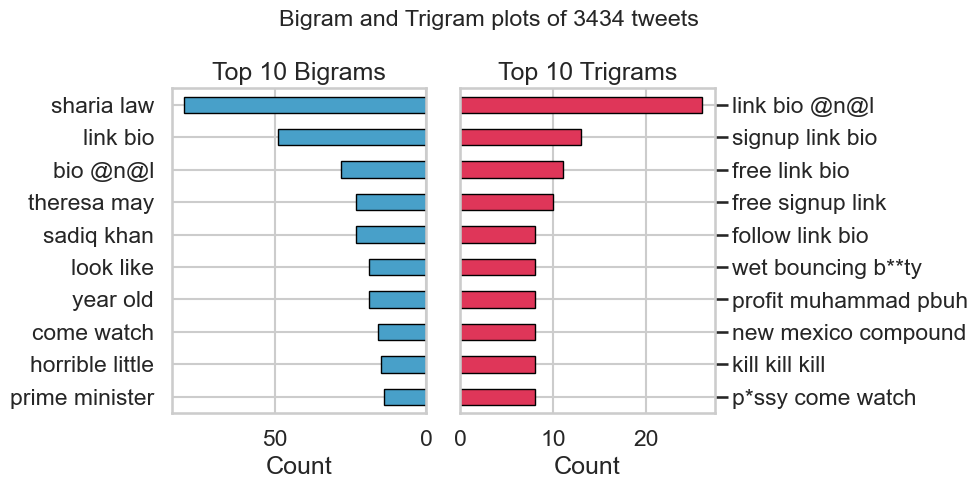

In [39]:
ngram1 = top_10_bigram_df
ngram2 = top_10_trigram_df

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1],})
fig.suptitle(f"Bigram and Trigram plots of {following.shape[0]} tweets")
# bigram plot
barh_ax1 = ax[0]
ngram1.sort_values('count', ascending=True).plot.barh(
    x='censored', y='count', ax=barh_ax1, color=barcolors[3], legend=False, **barstyle)
barh_ax1.set_title("Top 10 Bigrams")
barh_ax1.set_xlabel("Count")
barh_ax1.invert_xaxis()  # invert for mirror effect

barh_ax1.set_ylabel("")

# trigram plot
barh_ax2 = ax[1]
ngram2.sort_values('count', ascending=True).plot.barh(
    x='censored', y='count', ax=barh_ax2, color=barcolors[6], legend=False, **barstyle)
barh_ax2.set_title("Top 10 Trigrams")
barh_ax2.set_xlabel("Count")


barh_ax2.yaxis.set_tick_params(left=False, labelleft=False, right=True, labelright=True)
barh_ax2.set_ylabel("") 

plt.tight_layout()
plt.show()

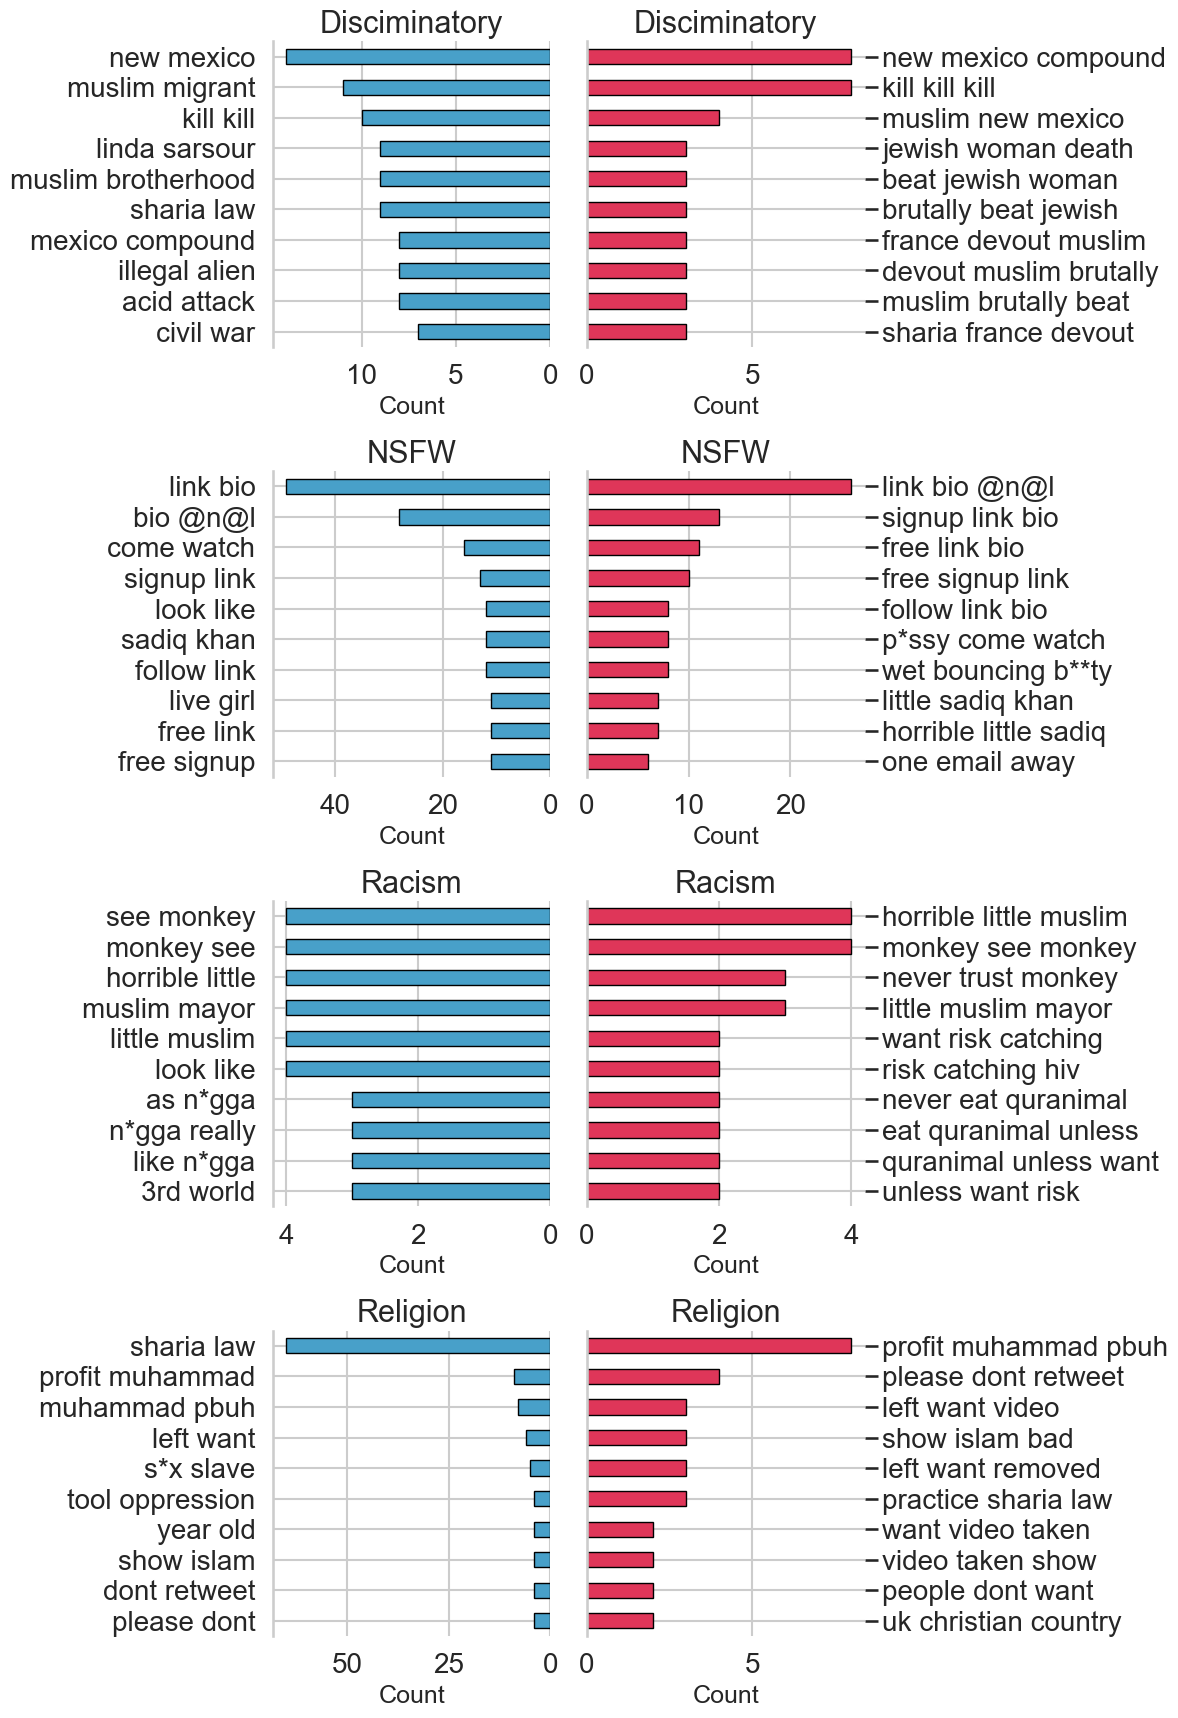

In [38]:
categories = bigram_df['category'].unique()
categories = [x for x in categories if x != 'No Abuse']

fig, axes = plt.subplots(len(categories), 2, figsize=(12, 5 * len(categories)), 
                         gridspec_kw={'width_ratios': [1, 1]})

if len(categories) == 1:
    axes = [axes]

for idx, category in enumerate(categories):
    group = bigram_df[bigram_df['category'] == category]
    trigram_group = trigram_df[trigram_df['category'] == category]
    
    # plot bigram data 
    group.sort_values('count', ascending=True).plot.barh(
        x='censored', y='count', ax=axes[idx][0], color=barcolors[3], legend=False, **barstyle)
    axes[idx][0].set_xlabel("Count")
    axes[idx][0].set_ylabel('', fontsize=25)
    axes[idx][0].invert_xaxis()  
    axes[idx][0].tick_params(axis='both', labelsize=20)
    axes[idx][0].set_title(f"{category}", fontsize=22)

    # plot trigram data
    trigram_group.sort_values('count', ascending=True).plot.barh(
        x='censored', y='count', ax=axes[idx][1], color=barcolors[6], legend=False, **barstyle)
    axes[idx][1].set_xlabel("Count")
    axes[idx][1].set_ylabel('', fontsize=25)
    axes[idx][1].yaxis.set_tick_params(left=False, labelleft=False, right=True, labelright=True)
    axes[idx][1].tick_params(axis='both', labelsize=20)
    axes[idx][1].set_title(f"{category}", fontsize=22)
    sns.despine(bottom=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [33]:
following

,user,tweets,labels,follows,label_text,cleaned,cleaned_transform,bigram,trigram
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,NSFW,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...,"[(u, complete), (complete, bitch), (bitch, sel...","[(u, complete, bitch), (complete, bitch, sell)..."
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,No Abuse,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...,"[(true, barnier), (barnier, eu), (eu, pushing)...","[(true, barnier, eu), (barnier, eu, pushing), ..."
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,No Abuse,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...,"[(u, never), (never, celebrate), (celebrate, s...","[(u, never, celebrate), (never, celebrate, st)..."
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,NSFW,fuck bit leave dont u understand,fuck off what bit about leave dont u understand,"[(fuck, bit), (bit, leave), (leave, dont), (do...","[(fuck, bit, leave), (bit, leave, dont), (leav..."
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,Religion,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...,"[(left, want), (want, video), (video, muslim),...","[(left, want, video), (want, video, muslim), (..."
...,...,...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,Religion,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...,"[(shes, pushing), (pushing, sharia), (sharia, ...","[(shes, pushing, sharia), (pushing, sharia, la..."
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,Religion,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...,"[(people, cant), (cant, allow), (allow, illega...","[(people, cant, allow), (cant, allow, illegals..."
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,Religion,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...,"[(sharia, procedure), (procedure, hand), (hand...","[(sharia, procedure, hand), (procedure, hand, ..."
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,Religion,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...,"[(sharia, law), (law, violates), (violates, bi...","[(sharia, law, violates), (law, violates, bill..."


In [34]:
following.to_csv("../../Dataset/tweets/twitter_processed.csv", index=False)